In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:

import math

import matplotlib.pyplot as plt
#import mplfinance as mpf
import pandas_datareader as pdr
import statsmodels.api as sm
import scipy.stats as scs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('crypto_data_cleaned.csv' ,index_col=0).dropna()

normalization of data so thaqt the data is in between 0 and 1

In [4]:
normalized_df=(data-data.min())/(data.max()-data.min())

view of daily returns 

No handles with labels found to put in legend.


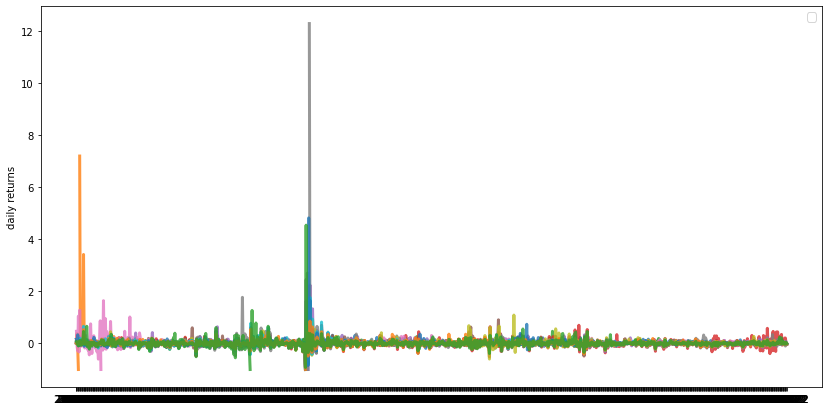

In [18]:
returns = normalized_df.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.show()

In [ ]:
#pip install FinQuant

FinQuant is a program for financial portfolio management

a public class Portfolio that holds and calculates quantities of a financial portfolio, which is a collection of Stock instances.

Make the most common quantitative calculations, such as:

cumulative returns of the portfolio’s stocks
daily returns of the portfolio’s stocks (daily percentage change),
daily log returns of the portfolio’s stocks,
Expected (annualised) Return,
Volatility,
Sharpe Ratio,
skewness of the portfolio’s stocks,
Kurtosis of the portfolio’s stocks,
the portfolio’s covariance matrix.

In [6]:
from finquant.portfolio import build_portfolio

In [30]:
pf = build_portfolio(data=data)
print(pf)
pf.properties()

Contains information about a portfolio.
----------------------------------------------------------------------
Stocks: _ADAUSDT_, _BTCUSDT_, _TRXUSDT_, _EOSUSDT_, _NEOUSDT_, _XLMUSDT_, _LINKUSDT_, _ZECUSDT_, _XRPUSDT_, _ETHUSDT_, _BNBUSDT_, _LTCUSDT_, _ETCUSDT_
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.856
Portfolio Volatility: 0.764
Portfolio Sharpe Ratio: 1.114

Skewness:
   _ADAUSDT_  _BTCUSDT_  _TRXUSDT_  _EOSUSDT_  _NEOUSDT_  _XLMUSDT_  \
0    1.06825   0.592319   1.113965   1.789965   2.039701   1.095529   

   _LINKUSDT_  _ZECUSDT_  _XRPUSDT_  _ETHUSDT_  _BNBUSDT_  _LTCUSDT_  \
0     0.70584   1.228882   1.162172   0.865205   0.877278    1.05716   

   _ETCUSDT_  
0   1.557407  

Kurtosis:
   _ADAUSDT_  _BTCUSDT_  _TRXUSDT_  _EOSUSDT_  _NEOUSDT_  _XLMUSDT_  \
0  -0.028907  -1.230058   0.319801   5.336654   5.068635   0.509971   

   _LINKUSDT_  _ZECUSDT_  _XRPUSDT_  _ETHUSDT_  _BNBUSDT_  _LTCUSDT_  \
0   -0.461801   1.464066   0.471097  -0.719

Optimisation of the portfolio by performing a Monte Carlo simulation.

Optimised investment strategies for maximum Sharpe Ratio and minimum Volatility.

tried various number of trials 5000 trails was optimal was 

/usr/local/lib/python3.7/dist-packages/finquant/monte_carlo.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(result)


----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 0.922
Volatility: 0.727
Sharpe Ratio: 1.262

Optimal weights:
            _ADAUSDT_  _BTCUSDT_  _TRXUSDT_  _EOSUSDT_  _NEOUSDT_  _XLMUSDT_  \
Allocation   0.110845   0.176699   0.103594   0.010518   0.005103   0.084235   

            _LINKUSDT_  _ZECUSDT_  _XRPUSDT_  _ETHUSDT_  _BNBUSDT_  _LTCUSDT_  \
Allocation    0.061411   0.032669   0.107269   0.092849   0.140449   0.012965   

            _ETCUSDT_  
Allocation   0.061394  
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 1.001
Volatility: 0.758
Sharpe Ratio: 1.314

Optimal weights:
            _ADAUSDT_  _BTCUSDT_  _TRXUSDT_  _EOSUSDT_  _NEOUSDT_  _XLMUSDT_  \
Allocation   0.147482    0.08124    0.04188   0.004575   0.033938   0.055511   

            _LINKUSDT_  _ZECUSDT_

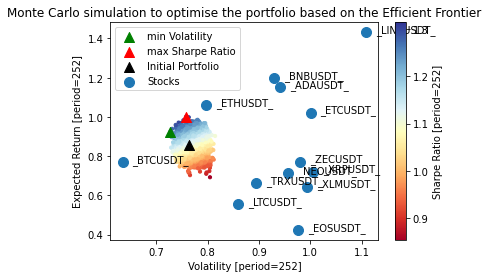

In [35]:
opt_w, opt_res = pf.mc_optimisation(num_trials=4000)
pf.mc_properties()
pf.mc_plot_results()
# again, the individual stocks can be added to the plot
pf.plot_stocks()
plt.show()

Observe increase in Sharp ratio and expected returns after optimisation 

Sharp-ratio

Next, we'll define a function for calculating daily returns for our coins

Random Porfolio generation

In [71]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights,
                                                                               mean_returns,
                                                                               cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record